<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#plot-a-sounding" data-toc-modified-id="plot-a-sounding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>plot a sounding</a></span></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#!conda install -y pytz

# plot a sounding

In [2]:
from a405.soundings.wyominglib import read_soundings
from a405.skewT.skewlib import makeSkewDry
from a405.thermo.thermlib import convertTempToSkew
import datetime
import pytz

soundings= read_soundings('soundingdir')
print(soundings.keys())
print(soundings['sounding_dict'].keys())

dict_keys(['filelist', 'attributes', 'input_args', 'file_dict', 'sounding_dict'])
dict_keys([(2017, 7, 1, 0), (2017, 7, 1, 12), (2017, 7, 2, 0), (2017, 7, 2, 12), (2017, 7, 3, 0), (2017, 7, 3, 12), (2017, 7, 4, 0), (2017, 7, 4, 12), (2017, 7, 5, 0), (2017, 7, 5, 12), (2017, 7, 6, 0), (2017, 7, 6, 12), (2017, 7, 7, 0), (2017, 7, 7, 12), (2017, 7, 8, 0), (2017, 7, 8, 12), (2017, 7, 9, 0), (2017, 7, 9, 12), (2017, 7, 10, 0), (2017, 7, 10, 12), (2017, 7, 11, 0), (2017, 7, 11, 12), (2017, 7, 12, 0), (2017, 7, 12, 12), (2017, 7, 13, 0), (2017, 7, 13, 12), (2017, 7, 14, 0), (2017, 7, 14, 12), (2017, 7, 15, 0), (2017, 7, 15, 12), (2017, 7, 16, 0), (2017, 7, 16, 12), (2017, 7, 17, 0), (2017, 7, 17, 12), (2017, 7, 18, 0)])


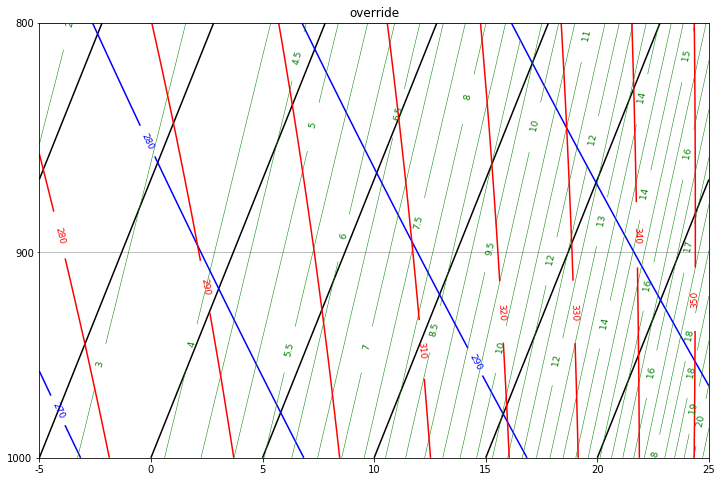

In [3]:
from a405.skewT.fullskew import makeSkewWet,find_corners,make_default_labels

def label_fun():
    """
    override the default rs labels with a tighter mesh
    """
    from numpy import arange
    #
    # get the default labels
    #
    tempLabels,rsLabels, thetaLabels, thetaeLabels = make_default_labels()
    #
    # change the temperature and rs grids
    #
    tempLabels = range(-40, 50, 5)
    rsLabels = [0.1, 0.25, 0.5, 1, 2, 3] + list(np.arange(4, 28, 0.5)) 
    return tempLabels,rsLabels, thetaLabels, thetaeLabels

fig,ax =plt.subplots(1,1,figsize=(12,8))
corners = [-5, 25]
ax, skew = makeSkewWet(ax, corners=corners, skew=35,label_fun=label_fun)
ax.set_title('override')
xcorners=find_corners(corners,skew=skew)
ax.set(xlim=xcorners,ylim=[1000,800]);
